<a href="https://colab.research.google.com/github/Ash-tensor/CMCT/blob/master/SNA_cmct.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 21 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent

In [ ]:
!pip install konlpy
!pip install pyvis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pickle
import konlpy
import csv
from konlpy.tag import Okt
import pprint
import pandas as pd

In [ ]:
with open('/content/drive/MyDrive/cmct/final_article_dict.p', 'rb') as f :
  final_article_dict = pickle.load(f)

In [ ]:
print(final_article_dict.keys())

dict_keys(['g1', 'g10', 'g11', 'g12', 'g13', 'g14', 'g15', 'g2', 'g3', 'g4', 'g5', 'g6', 'g7', 'g8', 'g9'])


In [ ]:
print(final_article_dict['g1'][0])

['2017.06.29. 오후 5:08', '【광주=뉴시스】신대희 기자 = ◇광산구 온라인창구 민원 해결 \'일등공신\'\n\n광주 광산구는 지난 1년 간 주민들이 온라인으로 접수한 민원이 3만9296건으로 집계됐다고 29일 밝혔다.\n\n이는 월 평균 3275건으로, 하루 100건이 넘는 불편 사항을 주민들이 온라인으로 알린 셈이다.\n\n불편 민원 종류를 보면 불법 주정차가 1만7204건으로 가장 많았다.\n\n이어 장애인주차구역 위반 신고 9148건, 공공시설물 파손 및 개·보수 요청 1711건, 불법광고물 신고 1424건, 쓰레기 무단 투기 신고 772건이었다.\n\n주민들은 \'광산365\', 행정자치부 \'생활불편신고\', 국민권익위원회의 \'국민신문고\'를 이용한 것으로 나타났다.\n\n특히 지난해부터 운영한 모바일, 온라인 민원 접수 창구 \'광산365\'가 전체 민원의 10%를 차지하고 있어 주민들의 활용도가 증대될 것으로 광산구는 기대하고 있다.\n\n광산구는 폭증하는 민원을 신속하게 접수하고, 처리하기 위해 시민소통팀을 지난해 7월 신설했다.\n\n온라인 민원을 통합 관리하는 시민소통팀은 접수 즉시 담당 부서에 민원을 전달하고 처리 결과를 주민에게 알려주고 있다.\n\n광산구는 생활민원 처리 요청을 접수 받는 즉시 관련법과 절차에 따라 처리할 방침이다.\n\n한편 국민권익위원회는 편리한 사용, 발 빠른 대처, 정확한 사후통지 성과를 인정해 광산구를 \'2016 고충민원 처리 평가 우수기관\'으로 지난 3월 선정했다.\n\n◇30일 광주청소년삶디자인센터서 청년 부채 관련 토크콘서트\n\n광주경제실천시민연합은 오는 30일 오후 6시30분 광주 동구 \'청소년삶디자인센터 1층 어서욥쇼홀\'에서 청년 부채와 관련된 토크콘서트를 연다고 29일 밝혔다.\n\n광주경실련과 청년유니온이 공동 주최하는 이번 토크콘서트에는 \'우리는 왜 공부할수록 가난해지는가\'의 저자 천주희 작가가 함께한다.\n\n천 작가는 청년들이 부채에 대해 갖고 있는 고민을 공유한다

In [ ]:
!mkdir data
!wget -O data/article_sample.txt https://raw.githubusercontent.com/thejungwon/text-mining-course/master/practice/week-07/data/article_sample.txt
!wget -O data/stopword.txt https://raw.githubusercontent.com/thejungwon/text-mining-course/master/practice/week-07/data/stopword.txt

--2023-01-16 02:11:14--  https://raw.githubusercontent.com/thejungwon/text-mining-course/master/practice/week-07/data/article_sample.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 345708 (338K) [text/plain]
Saving to: ‘data/article_sample.txt’

data/article_sample 100%[===================>] 337.61K  --.-KB/s    in 0.03s   

2023-01-16 02:11:14 (9.70 MB/s) - ‘data/article_sample.txt’ saved [345708/345708]

--2023-01-16 02:11:14--  https://raw.githubusercontent.com/thejungwon/text-mining-course/master/practice/week-07/data/stopword.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected

In [ ]:
contents = []

with open('data/article_sample.txt', encoding="utf-8") as tsvfile:
    reader = csv.reader(tsvfile, delimiter='\t')
    for row in reader:
        #0: 토픽, 1: 출처, 2: 날짜, 3: 제목, 4: 내용 
        contents.append(row[4])  

In [ ]:
print(contents[1])

비트코인 놓고 상반된 평가 내놔[ 김산하 기자  ] 니얼 퍼거슨 하버드대 교수(왼쪽), 워렌 버핏 버크셔해서웨이 회장(오른쪽)(사진=트위터)워렌 버핏 버크셔해서웨이 회장과 세계적 경제사학자 니얼 퍼거슨 하버드대 교수가 비트코인을 두고 상반된 평가를 내놓았다. 과거 비트코인을 비판하던 퍼거슨 교수는 자신의 발언을 후회한다고 언급한 반면 버핏 회장은 한층 더 부정적 시각을 견지해 눈길을 끌었다.버핏 회장은 지난달 25일(이하 현지시간) 미국 CNBC와의 인터뷰에서 “비트코인은 고유 가치가 없으며 아무것도 생산해내지 못한다. 기본적으로 망상”이라고 주장했다. 이어 “비트코인은 사기꾼들을 끌어들인다”면서 인생이 바뀔 것이라 기대하며 가상화폐(암호화폐)에 투자하는 투자자들이 안타깝다고 말했다.그는 지난해 5월 버크셔해서웨이 주주총회에서도 “비트코인은 쥐약과 같다”며 비판적 발언을 한 바 있다. 그 이전에도 비트코인을 ‘튤립 버블’이나 ‘신기루’에 비유해왔다.하지만 퍼거슨 교수는 생각이 달라졌다. 7일(현지시간) 외신에 따르면 퍼거슨 교수는 호주 경제일간지 AFR이 개최한 비즈니스 서밋의 비공개 행사에서 “암호화폐는 망상이 아니다”라고 말했다. 버핏의 주장과 정반대 입장을 밝힌 셈이다.퍼거슨 교수는 블록체인 기반의 암호화폐가 쓰일 만한 곳이 존재하지 않는다고 봤으나 생각이 바뀌었다고 했다. 그는 비트코인 가격이 절정에 달한 지난 2017년 말 미국 폭스비즈니스네트워크 방송에 출연해 “비트코인은 금융 역사상 가장 큰 버블(거품)”이라고 평가한 바 있다.그러다가 지난달에는 “비트코인은 ‘디지털 금’이 될 수 있는 후보 중 하나”라며 비트코인에 대해 긍정적으로 바뀐 시각을 내비쳤다. 또 “지난 10년간 금융의 변화보다 앞으로 10년의 금융의 변화가 훨씬 더 혁신적일 것”이라고 전망했다. 그는 최근 한 블록체인 회사 자문위원으로도 참여한 것으로 알려졌다.김산하 한경닷컴 기자 sanha@hankyung.com기사제보 및 보도자료 open@hankyung.com[한경닷컴 바로가기]

# 소통

In [ ]:
#https://foreverhappiness.tistory.com/38
#소통

import pickle
import pprint
import matplotlib
import matplotlib.pyplot as plt
import sys
from pyvis.network import Network
import networkx as nx

matplotlib.rc('font', family='NanumBarunGothic')

plt.rc('font', family='NanumBarunGothic') 

with open('/content/drive/MyDrive/cmct/data_word_list.p', 'rb') as f :
    data_word_list = pickle.load(f)

count = {}

for article in data_word_list[0] :
    article = list(set(article))
    for i, a in enumerate(article) :
        for b in article[i:]:
            if a == b : continue
            if a > b : a, b = b, a
            count[a, b] = count.get((a,b), 0) + 1

sorted_x = sorted(count.items(), key = lambda  kv : kv[1], reverse=True)
print(sorted_x[:20])

TOP_N = 30

unique_terms = []
for k, v in sorted_x[:TOP_N] :
    unique_terms+=list(k)
    print(len(unique_terms))
    unique_terms = list(set(unique_terms))

    print(len(unique_terms))
    unique_terms = sorted(unique_terms)

print(unique_terms)

import numpy as np
word_index = {}

for index, term in enumerate(unique_terms) :
    word_index[term] = index

print(word_index)

matrix = np.zeros((len(unique_terms), len(unique_terms)))
print(matrix)

for k, v in sorted_x[:30] :
    matrix[word_index[k[0]], word_index[k[1]]] = v
    matrix[word_index[k[1]], word_index[k[0]]] = v



[(('가운데', '무단'), 34206), (('가운데', '페이지'), 34004), (('가장', '분류'), 30261), (('가장', '추천'), 30145), (('가능성', '후속'), 29048), (('가장', '지금'), 28883), (('가장', '금지'), 28687), (('가장', '아웃'), 27699), (('가장', '이동해'), 26572), (('가장', '바로'), 26545), (('가장', '수'), 26397), (('가능성', '이동해'), 26100), (('가능성', '바로'), 25730), (('가능성', '아웃'), 25709), (('가능성', '수'), 25709), (('가능성', '및'), 25413), (('가장', '배포'), 25340), (('가장', '구독'), 25226), (('가운데', '통해'), 24377), (('가능성', '배포'), 24366)]
2
2
4
3
5
5
7
6
8
8
10
9
11
10
12
11
13
12
14
13
15
14
16
14
16
14
16
14
16
14
16
15
17
16
18
17
19
18
20
18
20
18
20
19
21
20
22
22
24
23
25
24
26
24
26
25
27
25
27
25
['가능성', '가동', '가운데', '가장', '구독', '그', '금지', '대한', '또', '무단', '및', '바로', '배포', '분류', '수', '아웃', '위', '이동해', '전', '지금', '추천', '통해', '페이지', '해당', '후속']
{'가능성': 0, '가동': 1, '가운데': 2, '가장': 3, '구독': 4, '그': 5, '금지': 6, '대한': 7, '또': 8, '무단': 9, '및': 10, '바로': 11, '배포': 12, '분류': 13, '수': 14, '아웃': 15, '위': 16, '이동해': 17, '전': 18, '지금': 19, '추천': 20, '통해': 21, '페이

In [ ]:
list(count.keys())[0:500]

In [ ]:
count_list = []
c = 0
for i in list(count.keys()) :
  #튜플 형태의 원소를 리스트 형태로 변환 -> ex) ['공백', '창원']
  list_i = list(i)
  #freq = 빈도, count dict의 값
  freq = count[i]
  list_i.append(freq)
  count_list.append(list_i)

In [ ]:
print(count_list[6])

['기자', '의사소통', 2]


In [ ]:
df = pd.DataFrame(count_list, columns = ['word1', 'word2', 'freq'])
df = df.sort_values(by=['freq'], ascending = False)
df = df.reset_index(drop = True)

In [ ]:
!pip install --upgrade scipy networkx

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.5/34.5 MB 24.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 70.7 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.7.3
    Uninstalling scipy-1.7.3:
      Successfully uninstalled scipy-1.7.3
  Attempting uninstall: networkx
    Found existing installation: networkx 2.8.8
    Uninstalling networkx-2.8.8:
      Successfully uninstalled networkx-2.8.8


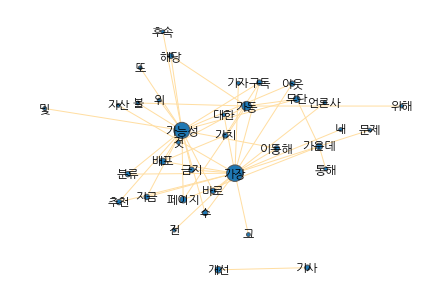

In [ ]:
import pandas as pd
import networkx as nx
import operator
import numpy as np

dataset = df

G_centrality = nx.Graph()

for ind in range((len(np.where(dataset['freq']>=20000)[0]))) :
  G_centrality.add_edge(dataset['word1'][ind], dataset['word2'][ind], weight = int(dataset['freq'][ind]))

dgr = nx.degree_centrality(G_centrality)
btw = nx.betweenness_centrality(G_centrality)
cls = nx.closeness_centrality(G_centrality)
egv = nx.eigenvector_centrality(G_centrality)
pgr = nx.pagerank(G_centrality)

sorted_dgr = sorted(dgr.items(), key = operator.itemgetter(1), reverse = True)
sorted_btw = sorted(btw.items(), key = operator.itemgetter(1), reverse = True)
sorted_cls = sorted(cls.items(), key = operator.itemgetter(1), reverse = True)
sorted_egv = sorted(egv.items(), key = operator.itemgetter(1), reverse = True)
sorted_pgr = sorted(pgr.items(), key = operator.itemgetter(1), reverse = True)

G = nx.Graph()

for i in range(len(sorted_pgr)) :
  G.add_node(sorted_pgr[i][0], nodesize = sorted_dgr[i][1])

for ind in range((len(np.where(dataset['freq'] > 20000)[0]))) :
  G.add_weighted_edges_from([(dataset['word1'][ind], dataset['word2'][ind], int(dataset['freq'][ind]))])

sizes = [G.nodes[node]['nodesize']*500 for node in G]

options = {
    'edge_color' : '#FFDEA2',
    'width' : 1,
    'with_labels' : True,
    'font_weight' : 'regular'
}

import matplotlib.font_manager as fm
import matplotlib.pyplot as plt


nx.draw(G, node_size = sizes, pos = nx.spring_layout(G, k = 3.5, iterations = 5), **options, font_family = "NanumGothic")
plt.savefig("communication_sna.png")
ax = plt.gca()
ax.collections[0].set_edgecolor("#555555")
plt.show()

In [ ]:
G.

In [ ]:
plt.savefig("communication_sna.png")

<Figure size 432x288 with 0 Axes>

# 공유가치

In [ ]:
import pickle
import pprint
import matplotlib
import matplotlib.pyplot as plt
import sys
from pyvis.network import Network
import networkx as nx

matplotlib.rc('font', family='NanumBarunGothic')

plt.rc('font', family='NanumBarunGothic') 

with open('/content/drive/MyDrive/cmct/data_word_list.p', 'rb') as f :
    data_word_list = pickle.load(f)

count = {}

for article in data_word_list[1] :
    article = list(set(article))
    for i, a in enumerate(article) :
        for b in article[i:]:
            if a == b : continue
            if a > b : a, b = b, a
            count[a, b] = count.get((a,b), 0) + 1

sorted_x = sorted(count.items(), key = lambda  kv : kv[1], reverse=True)

TOP_N = 30

unique_terms = []
for k, v in sorted_x[:TOP_N] :
    unique_terms+=list(k)
    unique_terms = list(set(unique_terms))

    unique_terms = sorted(unique_terms)

import numpy as np
word_index = {}

for index, term in enumerate(unique_terms) :
    word_index[term] = index

matrix = np.zeros((len(unique_terms), len(unique_terms)))

for k, v in sorted_x[:30] :
    matrix[word_index[k[0]], word_index[k[1]]] = v
    matrix[word_index[k[1]], word_index[k[0]]] = v



In [ ]:
count_list = []
c = 0
for i in list(count.keys()) :
  #튜플 형태의 원소를 리스트 형태로 변환 -> ex) ['공백', '창원']
  list_i = list(i)
  #freq = 빈도, count dict의 값
  freq = count[i]
  list_i.append(freq)
  count_list.append(list_i)

In [ ]:
df = pd.DataFrame(count_list, columns = ['word1', 'word2', 'freq'])
df = df.sort_values(by=['freq'], ascending = False)
df = df.reset_index(drop = True)

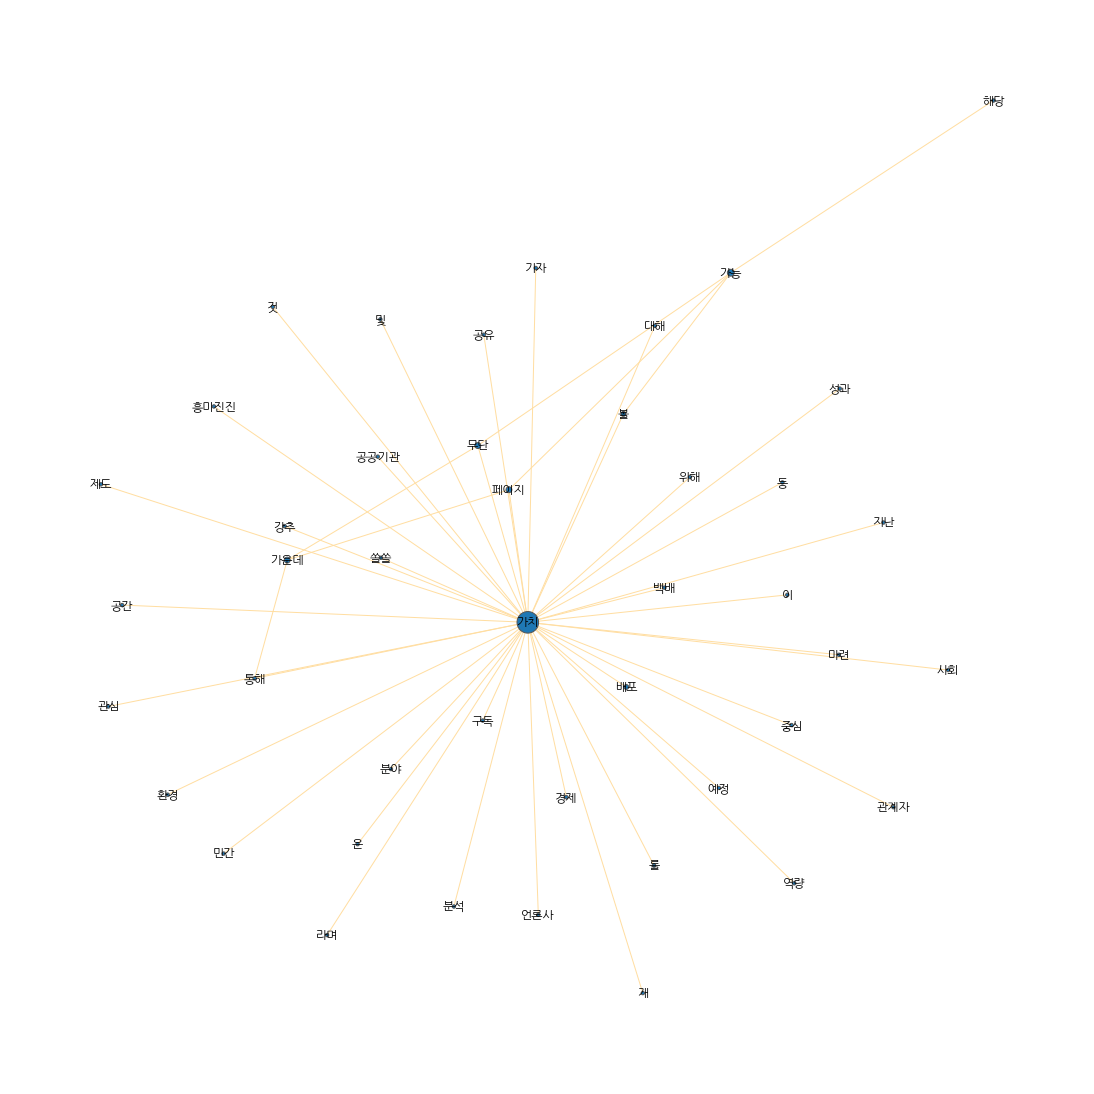

In [ ]:
import pandas as pd
import networkx as nx
import operator
import numpy as np

dataset = df

G_centrality = nx.Graph()

for ind in range((len(np.where(dataset['freq']>=25000)[0]))) :
  G_centrality.add_edge(dataset['word1'][ind], dataset['word2'][ind], weight = int(dataset['freq'][ind]))

dgr = nx.degree_centrality(G_centrality)
btw = nx.betweenness_centrality(G_centrality)
cls = nx.closeness_centrality(G_centrality)
egv = nx.eigenvector_centrality(G_centrality)
pgr = nx.pagerank(G_centrality)

sorted_dgr = sorted(dgr.items(), key = operator.itemgetter(1), reverse = True)
sorted_btw = sorted(btw.items(), key = operator.itemgetter(1), reverse = True)
sorted_cls = sorted(cls.items(), key = operator.itemgetter(1), reverse = True)
sorted_egv = sorted(egv.items(), key = operator.itemgetter(1), reverse = True)
sorted_pgr = sorted(pgr.items(), key = operator.itemgetter(1), reverse = True)

G = nx.Graph()

for i in range(len(sorted_pgr)) :
  G.add_node(sorted_pgr[i][0], nodesize = sorted_dgr[i][1])

for ind in range((len(np.where(dataset['freq'] > 25000)[0]))) :
  G.add_weighted_edges_from([(dataset['word1'][ind], dataset['word2'][ind], int(dataset['freq'][ind]))])

sizes = [G.nodes[node]['nodesize']*500 for node in G]

options = {
    'edge_color' : '#FFDEA2',
    'width' : 1,
    'with_labels' : True,
    'font_weight' : 'regular'
}

import matplotlib.font_manager as fm
import matplotlib.pyplot as plt

plt.figure(figsize = (15, 15))


nx.draw(G, node_size = sizes, pos = nx.spring_layout(G, k = 3.5, iterations = 15), **options, font_family = "NanumGothic")
ax = plt.gca()
ax.collections[0].set_edgecolor("#555555")
plt.show()

#SNA-all

In [ ]:
import pickle
import pprint
import matplotlib
import matplotlib.pyplot as plt
import sys
from pyvis.network import Network
import networkx as nx

matplotlib.rc('font', family='NanumBarunGothic')

plt.rc('font', family='NanumBarunGothic') 

with open('/content/drive/MyDrive/cmct/data_word_list.p', 'rb') as f :
    data_word_list = pickle.load(f)

count = {}

sna_datapool = []

for i in data_word_list :
  for k in i :
    sna_datapool.append(k)

print(len(sna_datapool))

print(sna_datapool[0])

3567
['광주', '뉴시스', '광주', '서구', '공공시설', '위탁', '관리', '도', '출자', '지방', '공기업', '서구', '시설', '관리', '공단', '지난', '생활환경', '센터', '출범', '사진', '광주', '서구', '제공', '재판매', '및', '금지', '광주', '뉴시스', '변', '재훈', '기자', '광주', '서구', '공공시설', '위탁', '관리', '도', '출자', '지방', '공기업', '서구', '시설', '관리', '공단', '지난', '생활환경', '센터', '출범', '시설', '관리', '공단', '지방', '공기업', '법', '지난해', '설립', '지난', '본격', '업무', '공단', '조직', '규모', '경영', '소통', '팀', '환경', '교통', '팀', '개', '부서', '명', '구성', '생활', '대형', '폐기물', '수집', '운반', '재활용품', '선', '별장', '운영', '공영', '주차장', '곳', '유개', '승강장', '곳', '대한', '위탁', '관리', '운영', '전담', '또', '개관', '완공', '국민', '체육', '센터', '회관', '비롯', '전통', '시장', '내', '주차장', '현수막', '게시', '체육', '시설', '등', '공공시설', '물의', '운영', '단계', '인수', '관리', '임낙평', '서구', '시설', '관리', '공단', '이사장', '출범', '통해', '체계', '효율', '시설', '관리', '조직', '운영', '노동조합', '상생', '동반', '관계', '형성', '약속', '양질', '서비스', '제공', '최선', '광주', '뉴시스', '광주', '서구', '구청', '민원', '실', '민원', '인과', '담당', '공무원', '간', '소통', '위해', '방향', '마이크', '설치', '운영', '사진', '광주', '서구', '제공', '재판매', '및', '

In [ ]:
for article in sna_datapool :
    article = list(set(article))
    for i, a in enumerate(article) :
        for b in article[i:]:
            if a == b : continue
            if a > b : a, b = b, a
            count[a, b] = count.get((a,b), 0) + 1

sorted_x = sorted(count.items(), key = lambda  kv : kv[1], reverse=True)

TOP_N = 30

unique_terms = []
for k, v in sorted_x[:TOP_N] :
    unique_terms+=list(k)
    unique_terms = list(set(unique_terms))

    unique_terms = sorted(unique_terms)

import numpy as np
word_index = {}

for index, term in enumerate(unique_terms) :
    word_index[term] = index

matrix = np.zeros((len(unique_terms), len(unique_terms)))

for k, v in sorted_x[:30] :
    matrix[word_index[k[0]], word_index[k[1]]] = v
    matrix[word_index[k[1]], word_index[k[0]]] = v



In [ ]:
count_list = []
c = 0
for i in list(count.keys()) :
  #튜플 형태의 원소를 리스트 형태로 변환 -> ex) ['공백', '창원']
  list_i = list(i)
  #freq = 빈도, count dict의 값
  freq = count[i]
  list_i.append(freq)
  count_list.append(list_i)

In [ ]:
df = pd.DataFrame(count_list, columns = ['word1', 'word2', 'freq'])
df = df.sort_values(by=['freq'], ascending = False)
df = df.reset_index(drop = True)

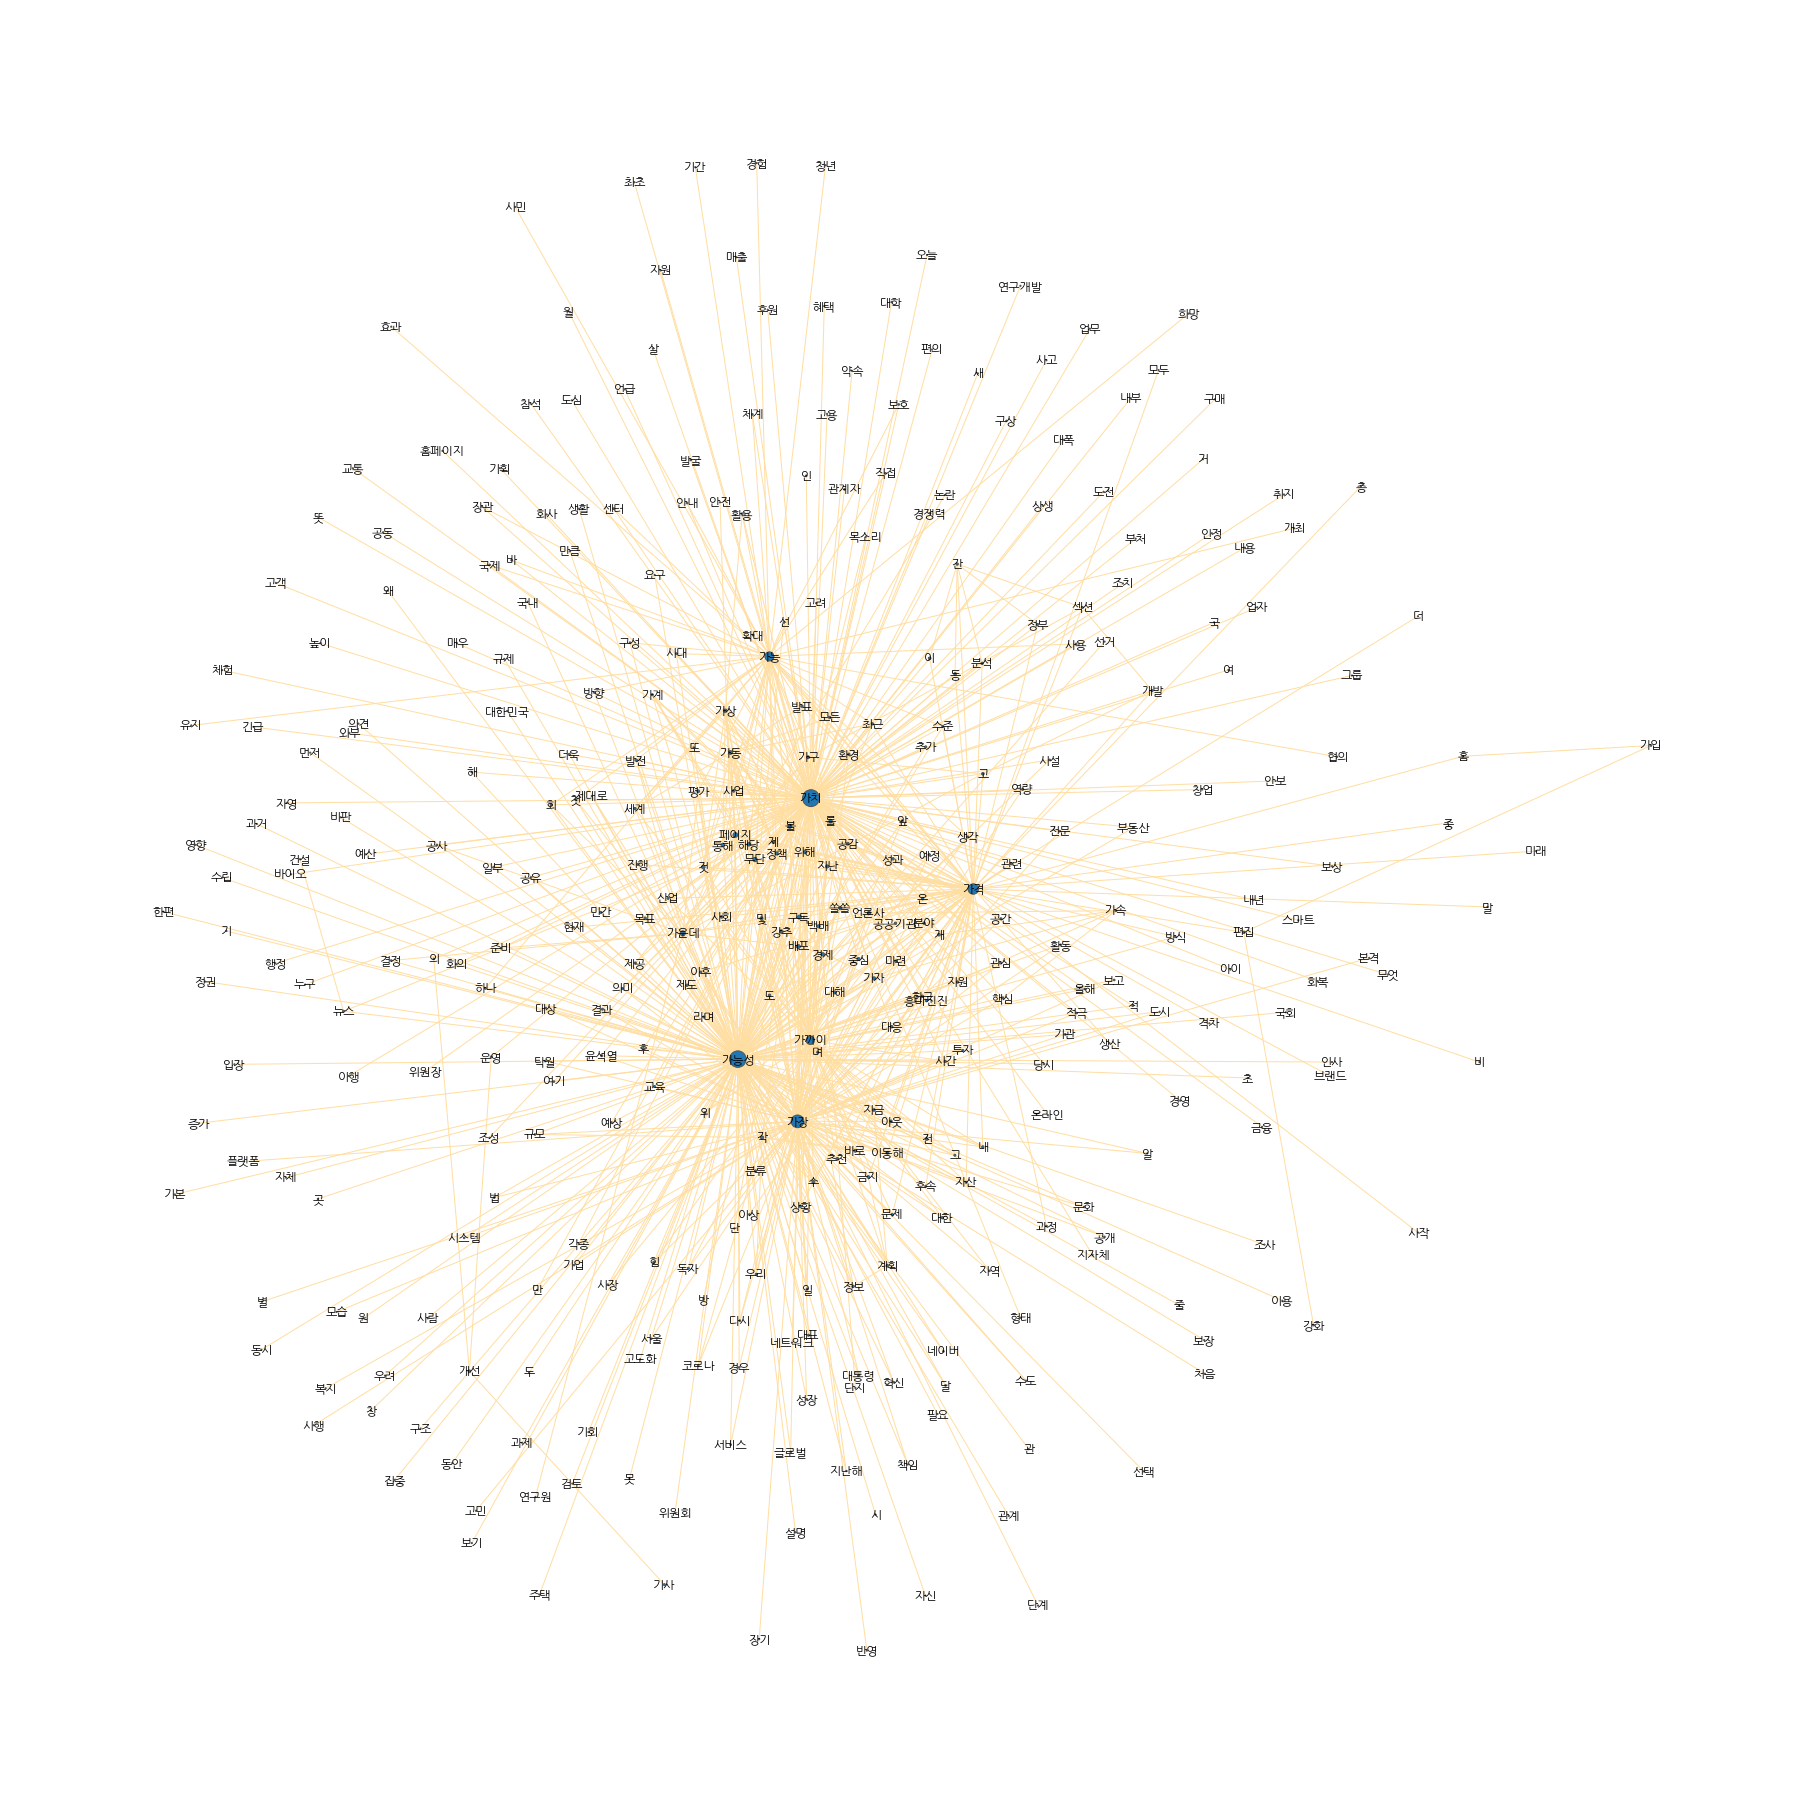

In [ ]:
import pandas as pd
import networkx as nx
import operator
import numpy as np

dataset = df

G_centrality = nx.Graph()

for ind in range((len(np.where(dataset['freq']>=25000)[0]))) :
  G_centrality.add_edge(dataset['word1'][ind], dataset['word2'][ind], weight = int(dataset['freq'][ind]))

dgr = nx.degree_centrality(G_centrality)
btw = nx.betweenness_centrality(G_centrality)
cls = nx.closeness_centrality(G_centrality)
egv = nx.eigenvector_centrality(G_centrality)
pgr = nx.pagerank(G_centrality)

sorted_dgr = sorted(dgr.items(), key = operator.itemgetter(1), reverse = True)
sorted_btw = sorted(btw.items(), key = operator.itemgetter(1), reverse = True)
sorted_cls = sorted(cls.items(), key = operator.itemgetter(1), reverse = True)
sorted_egv = sorted(egv.items(), key = operator.itemgetter(1), reverse = True)
sorted_pgr = sorted(pgr.items(), key = operator.itemgetter(1), reverse = True)

G = nx.Graph()

for i in range(len(sorted_pgr)) :
  G.add_node(sorted_pgr[i][0], nodesize = sorted_dgr[i][1])

for ind in range((len(np.where(dataset['freq'] > 25000)[0]))) :
  G.add_weighted_edges_from([(dataset['word1'][ind], dataset['word2'][ind], int(dataset['freq'][ind]))])

sizes = [G.nodes[node]['nodesize']*500 for node in G]

options = {
    'edge_color' : '#FFDEA2',
    'width' : 1,
    'with_labels' : True,
    'font_weight' : 'regular'
}

import matplotlib.font_manager as fm
import matplotlib.pyplot as plt

plt.figure(figsize = (20, 20))


nx.draw(G, node_size = sizes, pos = nx.spring_layout(G, k = 3.5, iterations = 15), **options, font_family = "NanumGothic")
plt.savefig("all_figure.png")
ax = plt.gca()
ax.collections[0].set_edgecolor("#555555")
plt.show()